## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [38]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [39]:
train, test = keras.datasets.cifar10.load_data()

In [40]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [41]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [42]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = 'hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = 'hidden_layer'+str(i+1))(x)
    out = keras.layers.Dense(units = output_units, activation = 'softmax', name = 'output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [43]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9, 0.7, 0.5, 0.3, 0.1] 

In [44]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print('Experiment with MOMENTUM = %.6f' %(momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov=True, momentum=momentum )
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
              epochs = EPOCHS, batch_size = BATCH_SIZE,
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    

Experiment with MOMENTUM = 0.900000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

Epoch 49/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.4409 - accuracy: 0.8429 - val_loss: 1.9015 - val_accuracy: 0.5237
Epoch 50/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.4123 - accuracy: 0.8544 - val_loss: 2.0284 - val_accuracy: 0.5164
Experiment with MOMENTUM = 0.700000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________________

Epoch 47/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.8723 - accuracy: 0.6937 - val_loss: 1.4838 - val_accuracy: 0.5108
Epoch 48/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.8553 - accuracy: 0.6989 - val_loss: 1.6090 - val_accuracy: 0.4810
Epoch 49/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.8445 - accuracy: 0.7060 - val_loss: 1.4927 - val_accuracy: 0.5044
Epoch 50/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.8467 - accuracy: 0.7037 - val_loss: 1.5168 - val_accuracy: 0.5020
Experiment with MOMENTUM = 0.500000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________

50000/50000 [==============================] - 5s 106us/step - loss: 1.1030 - accuracy: 0.6122 - val_loss: 1.6476 - val_accuracy: 0.4417
Epoch 45/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.1014 - accuracy: 0.6104 - val_loss: 1.3210 - val_accuracy: 0.5327
Epoch 46/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.0892 - accuracy: 0.6168 - val_loss: 1.3850 - val_accuracy: 0.5225
Epoch 47/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.0847 - accuracy: 0.6197 - val_loss: 1.3570 - val_accuracy: 0.5165
Epoch 48/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.0671 - accuracy: 0.6248 - val_loss: 1.4605 - val_accuracy: 0.4937
Epoch 49/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.0659 - accuracy: 0.6262 - val_loss: 1.3481 - val_accuracy: 0.5246
Epoch 50/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.0551 - accuracy: 0.6302 - val_loss: 

Epoch 42/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.2161 - accuracy: 0.5725 - val_loss: 1.4204 - val_accuracy: 0.5002
Epoch 43/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2023 - accuracy: 0.5778 - val_loss: 1.4157 - val_accuracy: 0.5005
Epoch 44/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.1905 - accuracy: 0.5841 - val_loss: 1.6256 - val_accuracy: 0.4371
Epoch 45/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.1932 - accuracy: 0.5801 - val_loss: 1.4460 - val_accuracy: 0.4914
Epoch 46/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.1799 - accuracy: 0.5858 - val_loss: 1.3615 - val_accuracy: 0.5222
Epoch 47/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.1764 - accuracy: 0.5874 - val_loss: 1.4585 - val_accuracy: 0.4923
Epoch 48/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.1709 - accuracy: 0.5890 - va

Epoch 40/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.2688 - accuracy: 0.5549 - val_loss: 1.4032 - val_accuracy: 0.5022
Epoch 41/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.2584 - accuracy: 0.5567 - val_loss: 1.5472 - val_accuracy: 0.4498
Epoch 42/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.2556 - accuracy: 0.5608 - val_loss: 1.4419 - val_accuracy: 0.4814
Epoch 43/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.2408 - accuracy: 0.5656 - val_loss: 1.4475 - val_accuracy: 0.4863
Epoch 44/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2380 - accuracy: 0.5663 - val_loss: 1.5985 - val_accuracy: 0.4471
Epoch 45/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.2309 - accuracy: 0.5697 - val_loss: 1.5542 - val_accuracy: 0.4531
Epoch 46/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.2266 - accuracy: 0.5703 

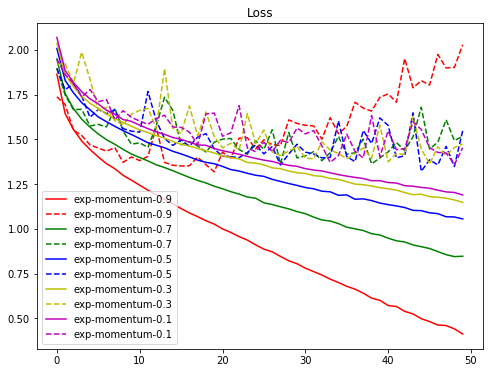

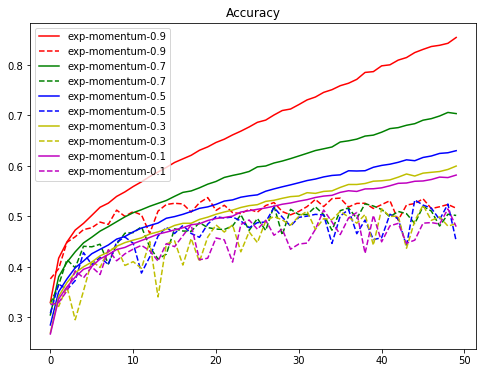

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
    

In [46]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.900000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

Epoch 49/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.5963 - accuracy: 0.7863 - val_loss: 1.7023 - val_accuracy: 0.5247
Epoch 50/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.5703 - accuracy: 0.7953 - val_loss: 1.6605 - val_accuracy: 0.5428
Experiment with MOMENTUM = 0.700000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 4s 85us/step - loss: 0.8626 - accuracy: 0.6955 - val_loss: 1.4661 - val_accuracy: 0.5164
Epoch 48/50
50000/50000 [==============================] - 4s 85us/step - loss: 0.8426 - accuracy: 0.7058 - val_loss: 1.4099 - val_accuracy: 0.5285
Epoch 49/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.8314 - accuracy: 0.7070 - val_loss: 1.4732 - val_accuracy: 0.5117
Epoch 50/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.8236 - accuracy: 0.7096 - val_loss: 1.4148 - val_accuracy: 0.5255
Experiment with MOMENTUM = 0.500000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________

Epoch 45/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.0604 - accuracy: 0.6286 - val_loss: 1.3119 - val_accuracy: 0.5391
Epoch 46/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.0432 - accuracy: 0.6340 - val_loss: 1.4518 - val_accuracy: 0.5065
Epoch 47/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.0377 - accuracy: 0.6360 - val_loss: 1.3850 - val_accuracy: 0.5137
Epoch 48/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.0250 - accuracy: 0.6404 - val_loss: 1.3960 - val_accuracy: 0.5203
Epoch 49/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.0193 - accuracy: 0.6445 - val_loss: 1.4333 - val_accuracy: 0.5020
Epoch 50/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.0026 - accuracy: 0.6495 - val_loss: 1.7684 - val_accuracy: 0.4218
Experiment with MOMENTUM = 0.300000
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.1802 - accuracy: 0.5852 - val_loss: 1.3820 - val_accuracy: 0.5082
Epoch 44/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.1687 - accuracy: 0.5883 - val_loss: 1.3744 - val_accuracy: 0.5140
Epoch 45/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.1607 - accuracy: 0.5921 - val_loss: 1.4430 - val_accuracy: 0.4911
Epoch 46/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.1526 - accuracy: 0.5933 - val_loss: 1.3659 - val_accuracy: 0.5216
Epoch 47/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.1421 - accuracy: 0.5989 - val_loss: 1.7392 - val_accuracy: 0.4207
Epoch 48/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.1387 - accuracy: 0.6001 - val_loss: 1.3579 - val_accuracy: 0.5195
Epoch 49/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.1306 - accuracy: 0.6034 - val_

Epoch 41/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.2592 - accuracy: 0.5580 - val_loss: 1.5000 - val_accuracy: 0.4604
Epoch 42/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.2542 - accuracy: 0.5605 - val_loss: 1.4098 - val_accuracy: 0.4995
Epoch 43/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.2503 - accuracy: 0.5622 - val_loss: 1.4371 - val_accuracy: 0.4939
Epoch 44/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.2351 - accuracy: 0.5661 - val_loss: 1.3871 - val_accuracy: 0.5162
Epoch 45/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2336 - accuracy: 0.5678 - val_loss: 1.3974 - val_accuracy: 0.5014
Epoch 46/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.2250 - accuracy: 0.5702 - val_loss: 1.4884 - val_accuracy: 0.4661
Epoch 47/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.2163 - accuracy: 0.5727 - val_

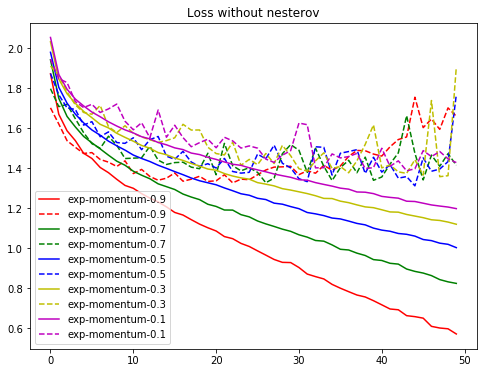

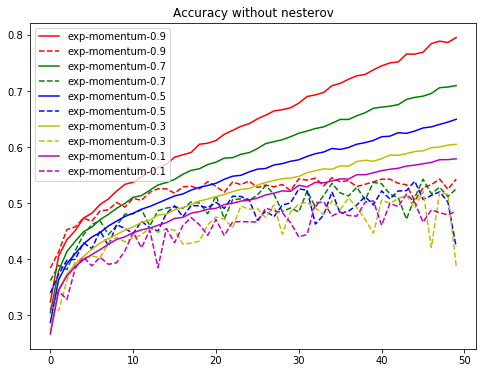

In [47]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss without nesterov")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy without nesterov")
plt.legend()
plt.show()